In [1]:
import pandas as pd
import Analyzer
import matplotlib.pyplot as plt

In [2]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-02')

end_date is initialized to 2020-07-19


In [4]:
df['MA20'] = df['close'].rolling(window=20).mean()

In [5]:
df['stddev'] = df['close'].rolling(window=20).std()

In [6]:
df['upper'] = df['MA20'] + (2 * df['stddev'])

In [7]:
df['lower'] = df['MA20'] - (2* df['stddev'])

In [9]:
df = df[19:]

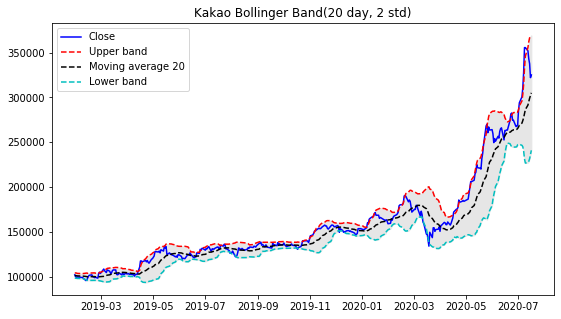

In [15]:
plt.figure(figsize=(9,5))
plt.plot(df.index,df['close'],color='#0000ff', label = 'Close')
plt.plot(df.index,df['upper'],'r--',label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = "Moving average 20")
plt.plot(df.index,df['lower'],'c--',label='Lower band')
plt.fill_between(df.index,df['upper'],df['lower'],color='0.9')
plt.legend(loc='best')
plt.title("Kakao Bollinger Band(20 day, 2 std)")
plt.show()

# 볼린저밴드 %b
- 주가가 현재 어느 위치에 있는지

In [17]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-02')
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (2 * df['stddev'])
df['lower'] = df['MA20'] - (2* df['stddev'])
df['PB'] = (df['close'] - df['lower']) / (df['upper']-df['lower'])
df = df[19:]

end_date is initialized to 2020-07-19


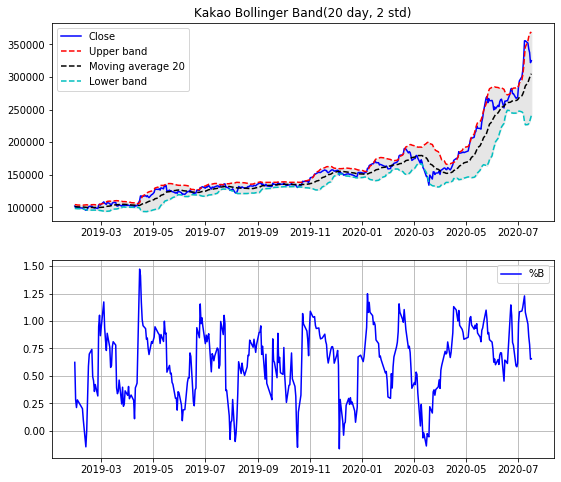

In [18]:
plt.figure(figsize=(9,8))
plt.subplot(2,1,1)
plt.plot(df.index,df['close'],color='#0000ff', label = 'Close')
plt.plot(df.index,df['upper'],'r--',label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = "Moving average 20")
plt.plot(df.index,df['lower'],'c--',label='Lower band')
plt.fill_between(df.index,df['upper'],df['lower'],color='0.9')
plt.legend(loc='best')
plt.title("Kakao Bollinger Band(20 day, 2 std)")
plt.subplot(2,1,2)
plt.plot(df.index,df['PB'],color='b',label='%B')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# 볼린저 밴드를 이용한 추세추종 매매기법

In [69]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오','2019-01-02')
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (2 * df['stddev'])
df['lower'] = df['MA20'] - (2* df['stddev'])
df['PB'] = (df['close'] - df['lower']) / (df['upper']-df['lower'])
df['TP'] = (df['close'] + df['high'] + df['low']) / 3
df['MF'] = df['TP'] * df['volume']

end_date is initialized to 2020-07-19


In [70]:
df['NMF'] = 0
df['PMF'] = 0

In [71]:
for i in range(len(df['close'])-1):
    if df.iloc[i]['TP'] < df.iloc[i+1]['TP']:
        df['PMF'].iloc[i+1] = df['TP'].iloc[i+1] * df['volume'].iloc[i+1]
        df['NMF'].iloc[i+1] = 0
    else:
        df['NMF'].iloc[i+1] = df['TP'].iloc[i+1] * df['volume'].iloc[i+1]
        df['PMF'].iloc[i+1] = 0

In [72]:
df['MFR'] = df['PMF'].rolling(window=10).sum()/df['NMF'].rolling(window=10).sum()

In [73]:
df['MFI10'] = 100 - (100/(1+df['MFR']))

In [74]:
df = df[19:]

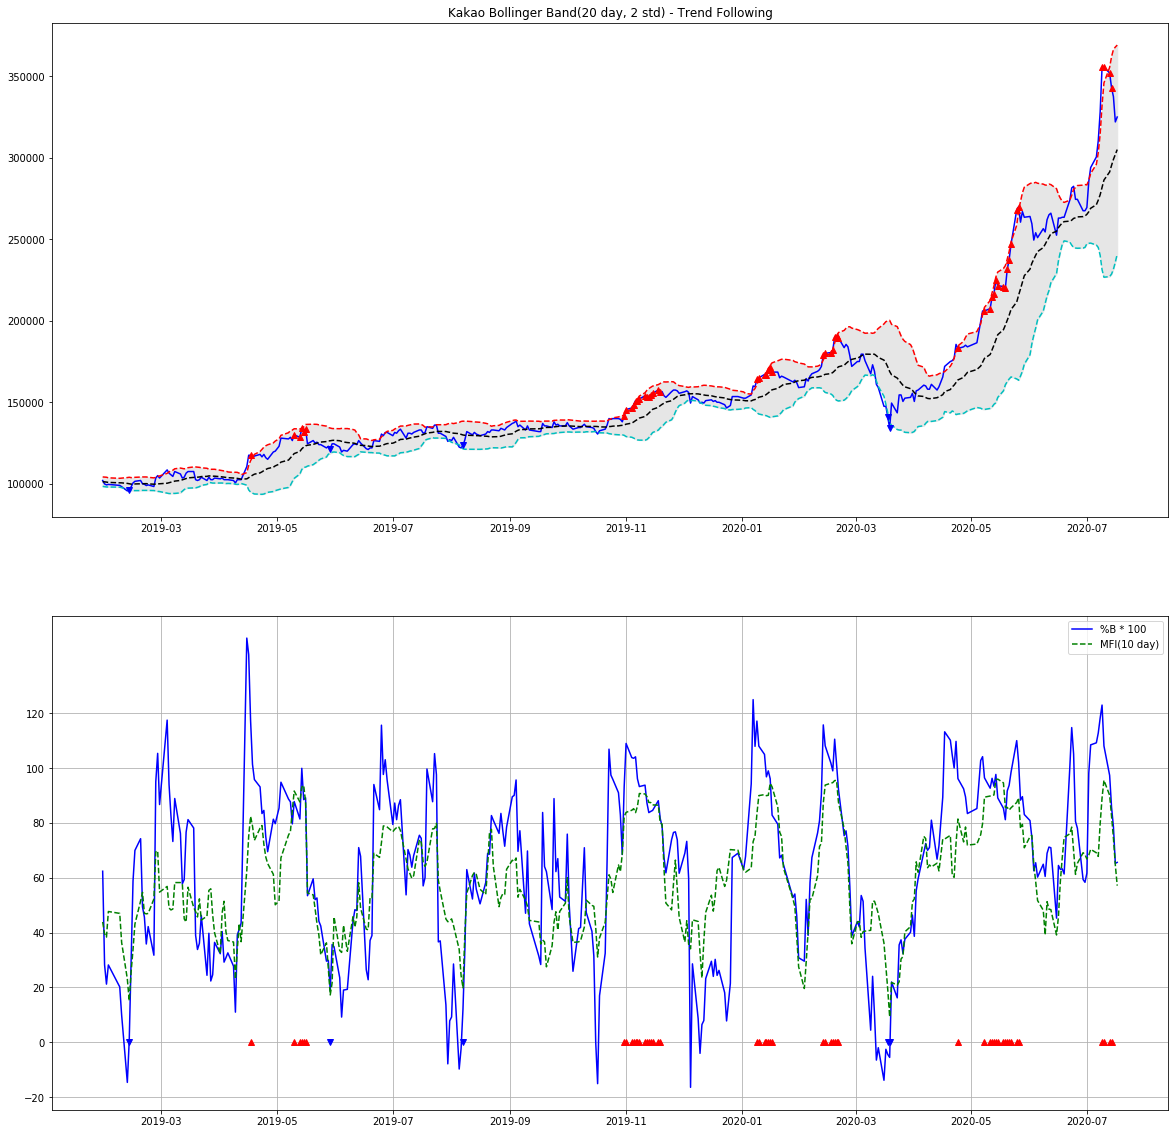

In [75]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Kakao Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index,df['close'],color='#0000ff',label='Close')
plt.plot(df.index,df['upper'],'r--',label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = "Moving average 20")
plt.plot(df.index,df['lower'],'c--',label='Lower band')
plt.fill_between(df.index,df['upper'],df['lower'],color='0.9')
for i in range(len(df['close'])):
    if df['PB'].iloc[i] > 0.8 and df['MFI10'].iloc[i] > 80:
        plt.plot(df.index.values[i],df['close'].values[i],'r^')
    elif df['PB'].values[i] < 0.2 and df['MFI10'].values[i] < 20:
        plt.plot(df.index.values[i],df['close'].values[i],'bv')
        
plt.subplot(2,1,2)
plt.plot(df.index,df['PB']*100,'b', label = '%B * 100')
plt.plot(df.index, df['MFI10'], 'g--', label = 'MFI(10 day)')
plt.yticks([-20,0,20,40,60,80,100,120])
for i in range(len(df['close'])):
    if df['PB'].iloc[i] > 0.8 and df['MFI10'].iloc[i] > 80:
        plt.plot(df.index.values[i],0,'r^')
    elif df['PB'].values[i] < 0.2 and df['MFI10'].values[i] < 20:
        plt.plot(df.index.values[i],0,'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# 볼린저밴드를 이용한 반전 매매기법
- 매수:%b < 0.05 & II% >0
- 매도: %b > 0.95 & II% <0

In [2]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('지누스','2019-01-01')

end_date is initialized to 2020-07-20


In [3]:
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + 2*df['stddev']
df['lower'] = df['MA20'] - 2*df['stddev']
df['PB'] = (df['close'] - df['lower']) / (df['upper']-df['lower'])
df['II'] = (df['close']*2 - df['high'] - df['low']) / (df['high']-df['low']) * df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum() * 100
df.dropna()

,code,date,open,high,low,close,diff,volume,MA20,stddev,upper,lower,PB,II,IIP21
date,,,,,,,,,,,,,,,
2019-11-27,013890,2019-11-27,94500,94500,90800,91400,2400,50486,87920.0,3998.499719,95916.999437,79923.000563,0.717582,-34112.162162,22.736649
2019-11-28,013890,2019-11-28,91500,93500,90800,91600,200,36202,88275.0,3994.058087,96263.116173,80286.883827,0.708122,-14748.962963,27.785611
2019-11-29,013890,2019-11-29,91800,93000,88000,90400,1200,61220,88460.0,4002.946283,96465.892567,80454.107433,0.621161,-2448.800000,30.135207
2019-12-02,013890,2019-12-02,90400,90400,84500,86700,3700,122904,88475.0,3995.375616,96465.751233,80484.248767,0.388934,-31246.779661,25.881200
2019-12-03,013890,2019-12-03,86500,87000,84500,87000,300,61158,88660.0,3825.179734,96310.359469,81009.640531,0.391508,61158.000000,28.673781
2019-12-04,013890,2019-12-04,85800,87900,85000,85800,1200,30897,88810.0,3637.509269,96085.018539,81534.981461,0.293128,-13850.379310,30.478231
2019-12-05,013890,2019-12-05,85800,87300,84800,85700,100,35726,89005.0,3333.794266,95672.588533,82337.411467,0.252159,-10003.280000,29.566855
2019-12-06,013890,2019-12-06,86000,86500,84200,84500,1200,59574,89090.0,3185.642131,95461.284263,82718.715737,0.139790,-44032.956522,25.013738
2019-12-09,013890,2019-12-09,85100,85100,80900,84000,500,115178,88915.0,3368.472245,95651.944489,82178.055511,0.135220,54846.666667,25.750198


C:\Users\minuk\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


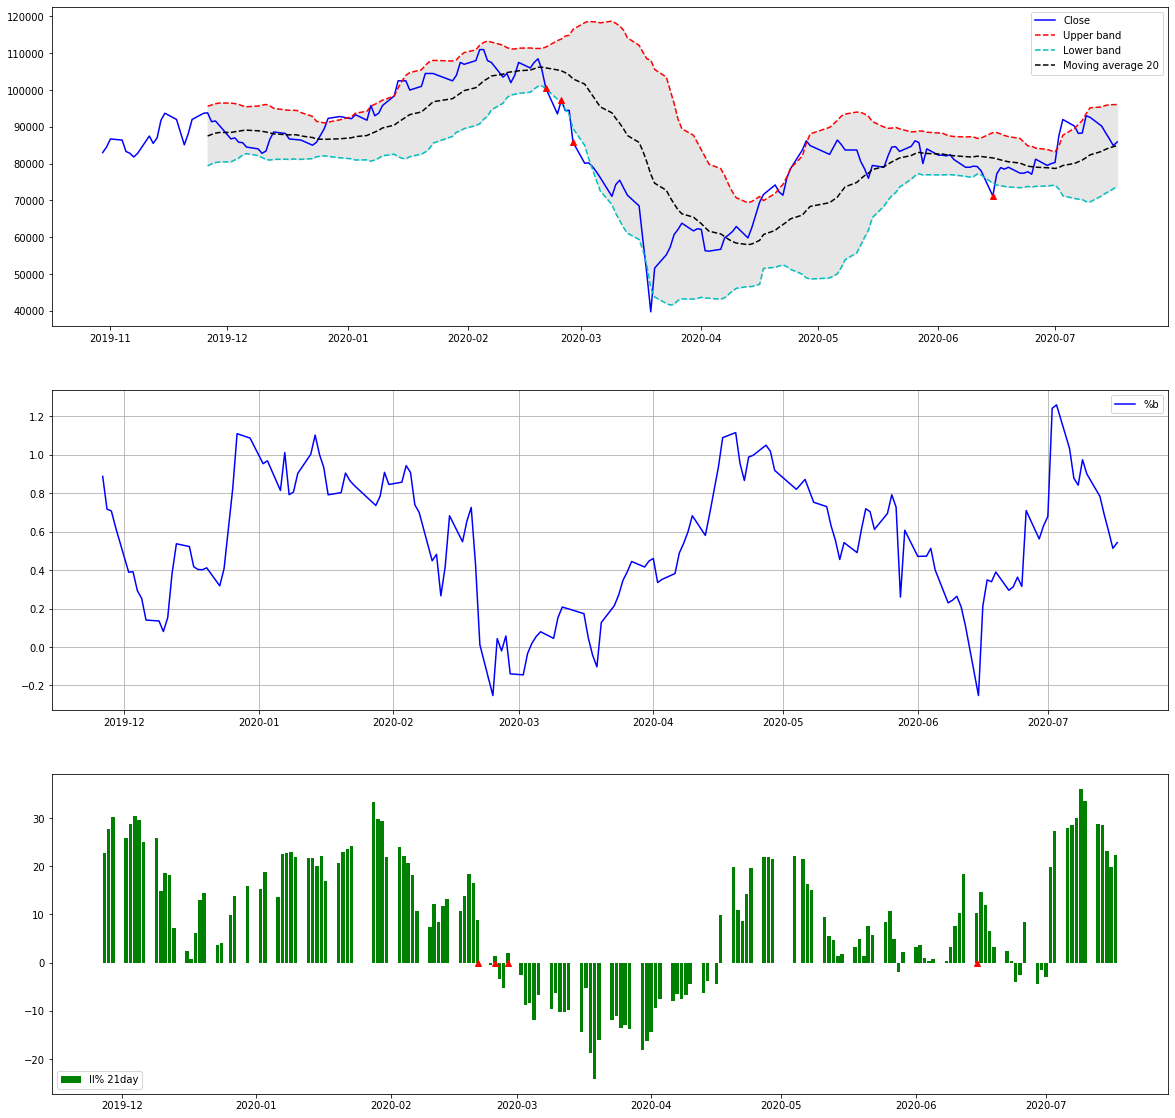

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(df.index,df['close'],'b',label='Close')
plt.plot(df.index,df['upper'],'r--', label = 'Upper band')
plt.plot(df.index,df['lower'],'c--', label = 'Lower band')
plt.plot(df.index,df['MA20'], 'k--', label = "Moving average 20")
plt.fill_between(df.index,df['upper'],df['lower'],color='0.9')
for i in range(len(df['close'])):
    if df['PB'].values[i] < 0.05 and df['IIP21'].values[i] > 0:
        plt.plot(df.index.values[i],df['close'].values[i],'r^')
    elif df['PB'].values[i] > 0.95 and df['IIP21'].values[i] < 0:
        plt.plot(df.index.values[i],df['close'].values[i],'bv')
plt.legend(loc='best')


plt.subplot(3,1,2)
plt.plot(df.index,df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.bar(df.index,df['IIP21'], color='g', label='II% 21day')
for i in range(len(df['close'])):
    if df['PB'].values[i] < 0.05 and df['IIP21'].values[i] > 0:
        plt.plot(df.index.values[i],0,'r^')
    elif df['PB'].values[i] > 0.95 and df['IIP21'].values[i] < 0:
        plt.plot(df.index.values[i],0,'bv')
plt.legend(loc='best')
plt.show()

end_date is initialized to 2020-07-20


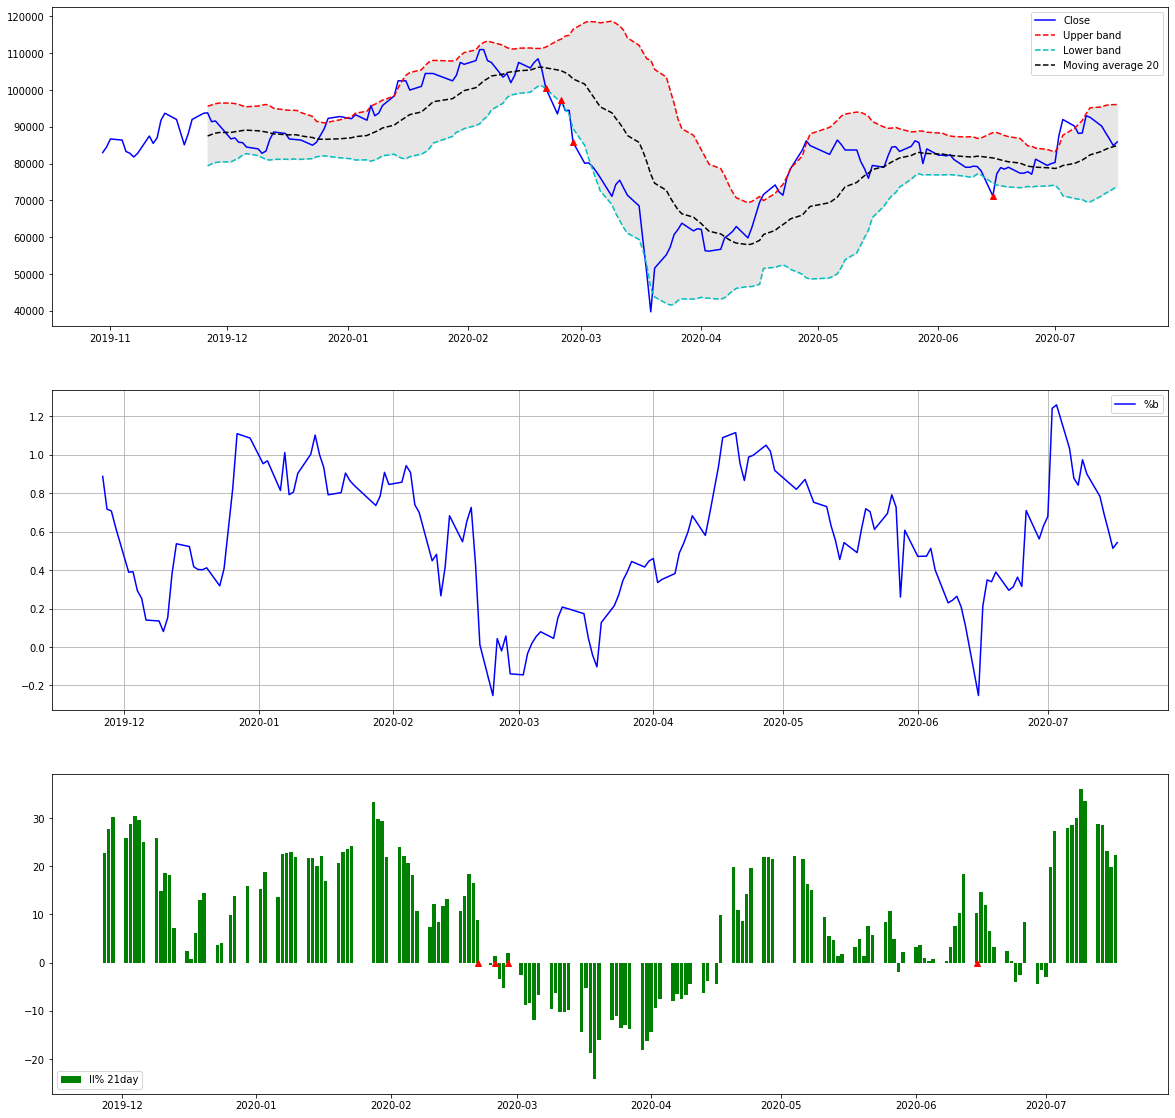

In [5]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('지누스','2019-01-01')
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + 2*df['stddev']
df['lower'] = df['MA20'] - 2*df['stddev']
df['PB'] = (df['close'] - df['lower']) / (df['upper']-df['lower'])
df['II'] = (df['close']*2 - df['high'] - df['low']) / (df['high']-df['low']) * df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum() * 100
df.dropna()
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(df.index,df['close'],'b',label='Close')
plt.plot(df.index,df['upper'],'r--', label = 'Upper band')
plt.plot(df.index,df['lower'],'c--', label = 'Lower band')
plt.plot(df.index,df['MA20'], 'k--', label = "Moving average 20")
plt.fill_between(df.index,df['upper'],df['lower'],color='0.9')
for i in range(len(df['close'])):
    if df['PB'].values[i] < 0.05 and df['IIP21'].values[i] > 0:
        plt.plot(df.index.values[i],df['close'].values[i],'r^')
    elif df['PB'].values[i] > 0.95 and df['IIP21'].values[i] < 0:
        plt.plot(df.index.values[i],df['close'].values[i],'bv')
plt.legend(loc='best')


plt.subplot(3,1,2)
plt.plot(df.index,df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.bar(df.index,df['IIP21'], color='g', label='II% 21day')
for i in range(len(df['close'])):
    if df['PB'].values[i] < 0.05 and df['IIP21'].values[i] > 0:
        plt.plot(df.index.values[i],0,'r^')
    elif df['PB'].values[i] > 0.95 and df['IIP21'].values[i] < 0:
        plt.plot(df.index.values[i],0,'bv')
plt.legend(loc='best')
plt.show()